In [31]:
!pip install -U memory_profiler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
import memory_profiler
%load_ext memory_profiler
import timeit
import matplotlib.pyplot as plt

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [33]:
# This cell is computing global alignment using standard global alignment dp algorithm
UP = (-1,0)
LEFT = (0, -1)
TOPLEFT = (-1, -1)
ORIGIN = (0, 0)

def traceback_global(v, w, pointers):
    i,j = len(v), len(w)
    new_v = []
    new_w = []
    while True:
        di, dj = pointers[i][j]
        if (di,dj) == LEFT:
            new_v.append('-')
            new_w.append(w[j-1])
        elif (di,dj) == UP:
            new_v.append(v[i-1])
            new_w.append('-')
        elif (di,dj) == TOPLEFT:
            new_v.append(v[i-1])
            new_w.append(w[j-1])
        i, j = i + di, j + dj
        if (i <= 0 and j <= 0):
            break
    return ''.join(new_v[::-1])+'\n'+''.join(new_w[::-1])
    


def ori_global_align(v, w, delta):
    """
    Returns the score of the maximum scoring alignment of the strings v and w, as well as the actual alignment as 
    computed by traceback_global. 
    
    :param: v
    :param: w
    :param: delta
    """
    M = [[-1919810 for j in range(len(w)+1)] for i in range(len(v)+1)]
    pointers = [[ORIGIN for j in range(len(w)+1)] for i in range(len(v)+1)]
    score, alignment = None, None
    # YOUR CODE HERE
    for i in range(len(v) + 1):
      for j in range(len(w) + 1):
        if (i == 0 and j == 0):
          M[i][j] = 0
        if (i > 0):
          if M[i - 1][j] + + delta['-'][v[i - 1]] > M[i][j]:
            M[i][j] = M[i - 1][j] + + delta['-'][v[i - 1]]
            pointers[i][j] = UP
        if (j > 0):
          if M[i][j - 1] + delta[w[j - 1]]['-'] > M[i][j]:
            M[i][j] = M[i][j - 1] + delta[w[j - 1]]['-']
            pointers[i][j] = LEFT
        if (i > 0 and j > 0):
          temp = delta[v[i - 1]][w[j - 1]] # 1 if (v[i - 1] == w[j - 1]) else -1
          if M[i - 1][j - 1] + temp > M[i][j]:
            M[i][j] = M[i - 1][j - 1] + temp
            pointers[i][j] = TOPLEFT
    score = M[len(v)][len(w)]
    alignment = traceback_global(v,w, pointers)
    return score, alignment

In [34]:
# This cell is computing fitting alignment using standard fitting alignment dp algorithm
def traceback_fitting(v, w, M, init_j, pointers):
    i, j = len(v), init_j
    new_v = []
    new_w = []
    while True:
        di, dj = pointers[i][j]
        if (di,dj) == LEFT:
            new_v.append('-')
            new_w.append(w[j-1])
        elif (di,dj) == UP:
            new_v.append(v[i-1])
            new_w.append('-')
        elif (di,dj) == TOPLEFT:
            new_v.append(v[i-1])
            new_w.append(w[j-1])
        i, j = i + di, j + dj
        if (i <= 0):
            break
    return ''.join(new_v[::-1]) + '\n'+''.join(new_w[::-1])

def ori_fitting_align(short, reference, delta):
    """
    Returns the score of the maximum scoring alignment of short and all 
    substrings of reference. 
    
    :param: short the shorter of the two strings we are trying to align    
    :param: reference the longer string among whose substrings we are doing global alignment
    :param: delta the scoring function for the alphabet of the two strings
    
    :returns: a tuple (score, alignment)
    """
    M = [[-1919810 for j in range(len(reference)+1)] for i in range(len(short)+1)]     
    pointers = [[ORIGIN for j in range(len(reference)+1)] for i in range(len(short)+1)] 
    score = None
    init_j = 0
    # YOUR CODE HERE
    for i in range(len(short) + 1):
      for j in range(len(reference) + 1):
        if (i == 0):
          if (0 > M[i][j]):
            M[i][j] = 0
            pointers[i][j] = ORIGIN
        if (i > 0):
          if M[i - 1][j] + delta['-'][short[i - 1]] > M[i][j]:
            M[i][j] = M[i - 1][j] + + delta['-'][short[i - 1]]
            pointers[i][j] = UP
        if (i > 0 and j > 0):
          if M[i][j - 1] + delta[reference[j - 1]]['-'] > M[i][j]:
            M[i][j] = M[i][j - 1] + delta[reference[j - 1]]['-']
            pointers[i][j] = LEFT
        if (i > 0 and j > 0):
          temp = delta[short[i - 1]][reference[j - 1]] # 1 if (v[i - 1] == w[j - 1]) else -1
          if M[i - 1][j - 1] + temp > M[i][j]:
            M[i][j] = M[i - 1][j - 1] + temp
            pointers[i][j] = TOPLEFT
    score = -1919810
    for j in range(len(reference) + 1):
      if M[len(short)][j] > score:
        score = M[len(short)][j]
        init_j = j
    alignment = traceback_fitting(short,reference,M, init_j,pointers)
    return score, alignment

In [35]:
# This cell is computing local alignment using standard local alignment dp algorithm
def traceback_local(v, w, M, init_i, init_j, pointers):
    i,j = init_i, init_j
    new_v = []
    new_w = []
    while True:
        di, dj = pointers[i][j]
        if (di,dj) == LEFT:
            new_v.append('-')
            new_w.append(w[j-1])
        elif (di,dj) == UP:
            new_v.append(v[i-1])
            new_w.append('-')
        elif (di,dj) == TOPLEFT:
            new_v.append(v[i-1])
            new_w.append(w[j-1])
        i, j = i + di, j + dj
        if (M[i][j] == 0):
            break
    return ''.join(new_v[::-1]) + '\n'+''.join(new_w[::-1])

def ori_local_align(v, w, delta):
    """
    Returns the score of the maximum scoring alignment of all possible substrings of v and w. 
    
    :param: v
    :param: w
    :param: delta
    """
    M = [[0 for j in range(len(w)+1)] for i in range(len(v)+1)]        
    pointers = [[ORIGIN for j in range(len(w)+1)] for i in range(len(v)+1)] 
    score = None
    init_i, init_j = 0,0
    # YOUR CODE HERE
    score = -1919810
    for i in range(len(v) + 1):
      for j in range(len(w) + 1):
        if (i > 0):
          if M[i - 1][j] + + delta['-'][v[i - 1]] > M[i][j]:
            M[i][j] = M[i - 1][j] + + delta['-'][v[i - 1]]
            pointers[i][j] = UP
        if (j > 0):
          if M[i][j - 1] + delta[w[j - 1]]['-'] > M[i][j]:
            M[i][j] = M[i][j - 1] + delta[w[j - 1]]['-']
            pointers[i][j] = LEFT
        if (i > 0 and j > 0):
          temp = delta[v[i - 1]][w[j - 1]] # 1 if (v[i - 1] == w[j - 1]) else -1
          if M[i - 1][j - 1] + temp > M[i][j]:
            M[i][j] = M[i - 1][j - 1] + temp
            pointers[i][j] = TOPLEFT
        if M[i][j] > score:
          score = M[i][j]
          init_i = i
          init_j = j
        elif M[i][j] == score:
          if j > init_j or (j == init_j and i > init_i):
            init_i = i
            init_j = j
    alignment = traceback_local(v, w, M, init_i, init_j , pointers)
    return score, alignment

In [36]:
# This cell is computing global alignment using space-efficient global alignment algorithm
def calc_fix(v, w, delta):
    len1 = len(v)
    len2 = len(w)
    dp = [[0 for j in range(len1 + 1)] for i in range(2)]
    curr = 0
    for i in range(len2 + 1):
        for j in range(len1 + 1):
            if i == 0 and j == 0:
                dp[curr][j] = 0
            elif i > 0 and j == 0:
                dp[curr][j] = dp[1 - curr][j] + delta['-'][w[i - 1]]
            elif i == 0 and j > 0:
                dp[curr][j] = dp[curr][j - 1] + delta[v[j - 1]]['-']
            else:
                l = dp[1 - curr][j] + delta['-'][w[i - 1]]
                u = dp[curr][j] = dp[curr][j - 1] + delta[v[j - 1]]['-']
                tl = dp[1 - curr][j - 1] + delta[w[i - 1]][v[j - 1]]
                dp[curr][j] = max(l, max(u, tl))
        curr = 1 - curr
    return dp[1 - curr]

def helper(v, w, delta, i0, j0, i1, j1, report):
    if j1 - j0 > 1:
        mid = int(j0 + (j1 - j0) / 2)
        prefix = calc_fix(v[i0:i1:], w[j0:mid:], delta)
        suffix = calc_fix(v[i0:i1:][::-1], w[mid:j1:][::-1], delta)
        istar = -1
        big = -1919810
        for i in range(len(prefix)):
           wt = prefix[i] + suffix[-1 - i]
           if big <= wt:
               big = wt
               istar = i
        report.append((istar + i0, mid))
        helper(v, w, delta, i0, j0, istar + i0, mid, report)
        helper(v, w, delta, istar + i0, mid, i1, j1, report)
    elif j1 - j0 == 1:
        report.append((i0, j0))
        report.append((i1, j1))
        return
    else:
        return

def global_dp(v, w, i0, j0, i1, j1, delta):
    s1 = v[max(0, i0 - 1):i1:]
    s2 = w[max(j0 - 1, 0):j1:]
    M = [[-1919810 for j in range(len(s2)+1)] for i in range(len(s1)+1)]
    pointers = [[(0, 0) for j in range(len(s2)+1)] for i in range(len(s1)+1)]
    for i in range(len(s1) + 1):
      for j in range(len(s2) + 1):
        if (i == 0 and j == 0):
          M[i][j] = 0
        if (i > 0):
          if M[i - 1][j] + delta['-'][s1[i - 1]] > M[i][j]:
            M[i][j] = M[i - 1][j] + + delta['-'][s1[i - 1]]
            pointers[i][j] = (i - 1, j)
        if (j > 0):
          if M[i][j - 1] + delta[s2[j - 1]]['-'] > M[i][j]:
            M[i][j] = M[i][j - 1] + delta[s2[j - 1]]['-']
            pointers[i][j] = (i, j - 1)
        if (i > 0 and j > 0):
          temp = delta[s1[i - 1]][s2[j - 1]] # 1 if (v[i - 1] == w[j - 1]) else -1
          if M[i - 1][j - 1] + temp > M[i][j]:
            M[i][j] = M[i - 1][j - 1] + temp
            pointers[i][j] = (i - 1, j - 1)
    ret = []
    x = len(s1)
    y = len(s2)
    while not pointers[x][y] == (x, y):
        if max(0, i0 - 1) + x >= 0 and max(0, j0 - 1) + y >= 0:
            ret.append((max(0, i0 - 1) + x, max(0, j0 - 1) + y))
        (temp1, temp2) = pointers[x][y]
        x = temp1
        y = temp2
    ret.append((i0, j0))
    return ret

def traceback_hirschberg(v, w, delta, report):
    path = []
    for i in range(len(report)):
        path.append(report[i])
        if i > 0 and report[i][0] - report[i - 1][0] > 1:
            temp = global_dp(v, w, report[i - 1][0], report[i - 1][1], report[i][0], report[i][1], delta)
            for vertex in temp:
                path.append(vertex)
    path = list(set(path))
    path.sort(key = lambda x: (x[0], x[1]))
    return path
                    

def hirschberg(v, w, delta):
    report = []
    helper(v, w, delta, 0, 0, len(v), len(w), report)
    report = list(set(report))
    report.sort(key = lambda x: (x[0], x[1]))
    # print(report)
    return traceback_hirschberg(v, w, delta, report)

def space_efficient_global_align(v, w, report):
    va = ""
    wa = ""
    for i in range(len(report)):
        (x, y) = report[i]
        if x > 0 or y > 0:
            (xp, yp) = report[i - 1]
            if x == xp + 1 and y == yp + 1:
                va += v[x - 1]
                wa += w[y - 1]
            elif y == yp + 1:
                va += '-'
                wa += w[y - 1]
            else:
                va += v[x - 1]
                wa += '-'
    return (va, wa)

In [37]:
# This cell is computing fitting alignment using space-efficient fitting alignment algorithm
def find_start(v, w, delta, i1, j1):
    vp = v[0:i1:][::-1]
    wp = w[0:j1:][::-1]
    dp = [[-114514 for j in range(len(wp) + 1)] for i in range(2)]
    curr = 0
    # print(vp, wp)
    for i in range(len(vp) + 1):
        for j in range(len(wp) + 1):
            dp[curr][j] = -114514
            if i == 0 and j == 0:
                dp[curr][j] = 0
            elif i == 0:
                dp[curr][j] = max(dp[curr][j], dp[curr][j - 1] + delta['-'][wp[j - 1]])
            elif j == 0:
                dp[curr][j] = max(dp[curr][j], dp[1 - curr][j] + delta[vp[i - 1]]['-'])
            else:
                dp[curr][j] = max(dp[curr][j], dp[1 - curr][j] + delta[vp[i - 1]]['-'])
                dp[curr][j] = max(dp[curr][j], dp[curr][j - 1] + delta['-'][wp[j - 1]])
                dp[curr][j] = max(dp[curr][j], dp[1 - curr][j - 1] + delta[vp[i - 1]][wp[j - 1]])
        # print(dp[curr])
        curr = 1 - curr
    ret = -1
    big = -1919810
    for j in range(len(wp) + 1):
        if dp[1 - curr][j] >= big:
            big = dp[1 - curr][j]
            ret = j
    return (0, j1 - ret)

def find_end(v, w, delta):
    dp = [[-114514 for j in range(len(w) + 1)] for i in range(2)]
    curr = 0
    for i in range(len(v) + 1):
        for j in range(len(w) + 1):
            dp[curr][j] = -114514
            if i == 0:
                dp[curr][j] = 0
            else:
                dp[curr][j] = max(dp[curr][j], dp[1 - curr][j] + delta[v[i - 1]]['-'])
                if j > 0:
                    dp[curr][j] = max(dp[curr][j], dp[curr][j - 1] + delta['-'][w[j - 1]])
                    dp[curr][j] = max(dp[curr][j], dp[1 - curr][j - 1] + delta[v[i - 1]][w[j - 1]])
        # print(dp[curr])
        curr = 1 - curr
    # print("----------------")
    ret = -1
    big = -1919810
    for j in range(len(w) + 1):
        if dp[1 - curr][j] >= big:
            big = dp[1 - curr][j]
            ret = j
    return (len(v), ret)

def space_efficient_fitting_align(v, w, delta):
    (i1, j1) = find_end(v, w, delta)
    (i0, j0) = find_start(v, w, delta, i1, j1)
    # print(i0, j0, i1, j1)
    h = hirschberg(v[i0:i1:], w[j0:j1:], delta)
    a = space_efficient_global_align(v[i0:i1:], w[j0:j1:], h)
    return a

In [38]:
# This cell is computing local alignment using space-efficient local alignment algorithm
def find_start_local(v, w, delta, i1, j1):
    vp = v[0:i1:][::-1]
    wp = w[0:j1:][::-1]
    dp = [[-114514 for j in range(len(wp) + 1)] for i in range(2)]
    curr = 0
    ret = (-1, -1)
    big = -1919810
    for i in range(len(vp) + 1):
        for j in range(len(wp) + 1):
            dp[curr][j] = -114514
            if i == 0 and j == 0:
                dp[curr][j] = 0
            elif i == 0:
                dp[curr][j] = max(dp[curr][j], dp[curr][j - 1] + delta['-'][wp[j - 1]])
            elif j == 0:
                dp[curr][j] = max(dp[curr][j], dp[1 - curr][j] + delta[vp[i - 1]]['-'])
            else:
                dp[curr][j] = max(dp[curr][j], dp[1 - curr][j] + delta[vp[i - 1]]['-'])
                dp[curr][j] = max(dp[curr][j], dp[curr][j - 1] + delta['-'][wp[j - 1]])
                dp[curr][j] = max(dp[curr][j], dp[1 - curr][j - 1] + delta[vp[i - 1]][wp[j - 1]])
            if dp[curr][j] > big:
                big = dp[curr][j]
                ret = (i, j)
        curr = 1 - curr
    return (i1 - ret[0], j1 - ret[1])

def find_end_local(v, w, delta):
    dp = [[0 for j in range(len(w) + 1)] for i in range(2)]
    curr = 0
    ret = (-1, -1)
    big = -1919810
    for i in range(len(v) + 1):
        for j in range(len(w) + 1):
            dp[curr][j] = 0
            if i == 0 and j == 0:
                dp[curr][j] = dp[curr][j]
            elif i == 0:
                dp[curr][j] = max(dp[curr][j], dp[curr][j - 1] + delta['-'][w[j - 1]])
            elif j == 0:
                dp[curr][j] = max(dp[curr][j], dp[1 - curr][j] + delta[v[i - 1]]['-'])
            else:
                dp[curr][j] = max(dp[curr][j], dp[1 - curr][j] + delta[v[i - 1]]['-'])
                dp[curr][j] = max(dp[curr][j], dp[curr][j - 1] + delta['-'][w[j - 1]])
                dp[curr][j] = max(dp[curr][j], dp[1 - curr][j - 1] + delta[v[i - 1]][w[j - 1]])
            if dp[curr][j] >= big:
                big = dp[curr][j]
                ret = (i, j)
        # print(dp[curr])
        curr = 1 - curr
    # print("----------------")
    return ret

def space_efficient_local_align(v, w, delta):
    (i1, j1) = find_end_local(v, w, delta)
    (i0, j0) = find_start_local(v, w, delta, i1, j1)
    h = hirschberg(v[i0:i1:], w[j0:j1:], delta)
    a = space_efficient_global_align(v[i0:i1:], w[j0:j1:], h)
    return a

In [39]:
# This cell is for correctness test with genereted sequences
from random import seed
from random import randint
from datetime import datetime

seed(datetime.now())

keys = ['A', 'C', 'T', 'G', '-']
delta = {}
for i in range(len(keys)):
    delta[keys[i]] = {k : v for (k,v) in zip(keys, [1 if keys[i] == keys[j]  else -1 for j in range(len(keys))])}

def compute_score(va, wa):
    if not len(va) == len(wa):
        print("invalid alignment")
        return -1919810
    else:
        score = 0
        for i in range(len(va)):
            score += delta[va[i]][wa[i]]
        return score

def generate_sequence(l):
    ret = ""
    for i in range(l):
        it = randint(0, len(keys) - 2)
        ret += keys[it]
    return ret

def test_global(n):
    for i in range(n):
        vl = randint(10, 100)
        wl = randint(10, 100)
        v = generate_sequence(vl)
        w = generate_sequence(wl)
        (score_base, a_base) = ori_global_align(v, w, delta)
        (va, wa) = space_efficient_global_align(v, w, hirschberg(v, w, delta))
        score = compute_score(va, wa)
        if not score == score_base:
            print(v, w, "optimal score:", score_base, "your_score:", score, va, wa)
        else:
            print("original algo score: ", score_base, ", space-efficient algo score: ", score, ". Global alignment correctness test passed!")

def test_fitting(n):
    for i in range(n):
        vl = randint(10, 100)
        wl = randint(10, 100)
        v = generate_sequence(vl)
        w = generate_sequence(wl)
        (score_base, a_base) = ori_fitting_align(v, w, delta)
        (va, wa) = space_efficient_fitting_align(v, w, delta)
        score = compute_score(va, wa)
        if not score == score_base:
            print(v, w, "optimal score:", score_base, "your_score:", score)
        else:
            print("original algo score: ", score_base, ", space-efficient algo score: ", score, ". Fitting alignment correctness test passed!")

def test_local(n):
    for i in range(n):
        vl = randint(10, 100)
        wl = randint(10, 100)
        v = generate_sequence(vl)
        w = generate_sequence(wl)
        (score_base, a_base) = ori_local_align(v, w, delta)
        (va, wa) = space_efficient_local_align(v, w, delta)
        score = compute_score(va, wa)
        if not score == score_base:
            print(v, w, "optimal score:", score_base, "your_score:", score)
        else:
            print("original algo score: ", score_base, ", space-efficient algo score: ", score, ". Local alignment correctness test passed!")

In [40]:
# This cell is for automation test for randomly generated sequences. You can change "iteration_rounds" to perform test in different times
iteration_rounds = 5
test_global(iteration_rounds)
test_fitting(iteration_rounds)
test_local(iteration_rounds)

original algo score:  8 , space-efficient algo score:  8 . Global alignment correctness test passed!
original algo score:  -16 , space-efficient algo score:  -16 . Global alignment correctness test passed!
original algo score:  -53 , space-efficient algo score:  -53 . Global alignment correctness test passed!
original algo score:  0 , space-efficient algo score:  0 . Global alignment correctness test passed!
original algo score:  3 , space-efficient algo score:  3 . Global alignment correctness test passed!
original algo score:  8 , space-efficient algo score:  8 . Fitting alignment correctness test passed!
original algo score:  2 , space-efficient algo score:  2 . Fitting alignment correctness test passed!
original algo score:  -2 , space-efficient algo score:  -2 . Fitting alignment correctness test passed!
original algo score:  2 , space-efficient algo score:  2 . Fitting alignment correctness test passed!
original algo score:  3 , space-efficient algo score:  3 . Fitting alignment 

In [41]:
# Following sequences are from Homo sapiens isolate CHM13 chromosome 8 (GenBank: CP068270.2)
# Genome source: https://www.ncbi.nlm.nih.gov/nuccore/CP068270.2?report=fasta
Sequence1 = "CCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAA"
Sequence2 = "CCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTTAACCCTTAGCCCTAGCCCTAGCCCTAGCCCTAGCCCTAGCCCTAGCCCTAGCCCTAGCCCTAGCCCTAGCCCTAGCCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCT"
Sequence3 = "AACCCTAACCCTAACCCTATCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAAAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAAAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAAAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAAAACCC"
Sequence4 = "TAACCCTAAAACCCTAACCCTAAAACCCTAACCCTAACCCTGACCCTGACCCTGACCCTGACCCTGACCCTGACCCTGACCCTGACCCTAACCCTGACCCTAACCCTAACCCTGACCCTAACCCTAACCCTAACCCTAACCACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAAACCCTAAGCCCTAGCCCTAGCCCTAG"
Sequence5 = "CCCTAGCCCTAGCCCTAGCCCTAGCCCTAGCCCTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAAACCCTAAACCCTAACCCTAACCCTAACCCTAACCCTAACCCCAACCCCAACCCCAACCCCAACCCCAACCCCACCCCGAACCCCGAACCCCGAACCCGAACCCGAACCCGAACCCGAACCCGAACCCGAACCCGAACCCGAACCCGAACCCTAACCCCTAACCCTAACCCTAACCCTAACCCTAACCCTAA"
Sequence6 = "CCCTAACCCCTAACCCTAATCCTAACCCTAACCCTAACCCTAACCCAACCCTAACCATAACCCAACCCTACCCTAACCCTAGCCCCTAACCCAACCCTAACCCAAACCTAACCCTAGCCCCTAAACCTAAACCTAACTCCTAACCCCTAACTCCTAACCCTAACCCTAACCCTAACCCCTAACCCTAACCCCTAACCCCTATCCCTAACCCCTAACCCCTAACCCCAACCCCAACCCTAAACCCAACCCCAACCCCAACCCGACTCTGACCCTGAACCCGACCCCTAACCCTAAACCCTAACCCCTAACCCTAACCCTACCCCTAGCCCAAACCCGAACCCGAACCCGA"
Sequence7 = "ACCCTAACCCTAACCCCTAACCCTAACCCCTAACCCTAACCCTTAACCCTAACCCTAACCCTACCCCAACCCCAACCCTAACCCCTAACCCCTAATCCTAACCCCTAACCCCTAACCCTCACCCTAACCCTAAACCACATGAGCAATGTGGGTGTTATATTTTGGGTGTCATGTGTGCATTAGGAATGCTGCATTTGTGTTCCGACACTGCAGTTGGCCCCTGCAATGCAGCCCCTCGCCTTGACTTGGGAGAATCTCGGTGCGCAGGATTCAGAGGGGC"
Sequence8 = "TTTTGGTTTCCCGTTTTCCACACTGAACCGTTCTAACTGGTCTCTGACCTTGATTATTAACGGCTGCAACCGGGAAAGATTTTATTCACCGTCGATGCGGCCCCGAGTTGTCCCAAAGCCAGGCAGTGCCCCCAACGTCT"
Sequence9 = "GTGCTTAGGAGAATGCTGCTCCACCTTTACGGTGTCCCCCAGGTCTGTGCTAAGCAGAACGCAGCTCCGCCCTCGCGGTGCCCTCAGCCCGCCCGCCCGGGTCTGACCTGAGGAGAACTCTGCTCCGCCTTCGCAGTACCACTGAAATCTGTGCAGATGAGAACGCAGCTCCGCCCTCGCGATGCTCTCCGCGTCTGTGCTGAGGAGAACCCAACTCCGCTCTCGCAAAGGCACGGCGCGCCGGCGCCGGCGCAGAGAGGCGCGCTGCGCCGGCGCAGGAGCTGTTCGGGAGACGCGGCGCAGGGCATAGACGCACGCCTCCGCGTCCCCGGAGGGGAGGGGTCGCTGGGCAGGCGGGAGTGAGGCGCGGCGCAGGCGCAGGCGCAGAGACGCACGTCGCTGGGCTCAGGGTGGCGGGGC"
Sequence10 = "GTGTTGCAGGTGTACAGTTGCACGCCGCCGGGCGGGGAGCGCGGGAATGGCGAGGTGCAGACGCAGAGACACACGTCCCCGGCGGCGCAGCGCACAGACGGGTGGAACCTGAGTAATCTGAAAAGCCCGGTTCGGGTGTCCCCTGCTTGTACCCGGGCACTACAGGACCTGCTTGCCCACGGTGCTGTGCCATTGCGCCCCCTGCTGGCGACTAGGGCAACTTCAGGGCCCTCTTCCTTACAGTGGTGTCCAGCGCCTCCTGCTGGCGACGGGGCACGGCAGGGCTCTCTTGCTCGCAGTATACTGGCGGCACGCCGCCTGCTGACAGCTAGGGACATTGCAGGGCCCTCTTGCTCACATTGTAGTGGCAGCACACCCGCCTGCTGGCAGCTGGGGACACTGCCGGGCCCTCTTGCTCCAGGTGTAGTGGCGGCTGCTCCCCTGCTGGCAGCTGGGGACACTGCCGGGCCCTCTTGCTTGCAGTGTAGTCGGGGCACGCCCTCTTCTGTCCGCTGGGGGCACTACAGGATCCTCTTGCTCAGTGTAGTGGCAGCACGCCC"

In [42]:
# This cell is for correctness test with customized sequences
from random import seed
from random import randint
from datetime import datetime

seed(datetime.now())

keys = ['A', 'C', 'T', 'G', '-']
delta = {}
for i in range(len(keys)):
    delta[keys[i]] = {k : v for (k,v) in zip(keys, [1 if keys[i] == keys[j]  else -1 for j in range(len(keys))])}

def compute_score(va, wa):
    if not len(va) == len(wa):
        print("invalid alignment")
        return -1919810
    else:
        score = 0
        for i in range(len(va)):
            score += delta[va[i]][wa[i]]
        return score

def generate_sequence(l):
    ret = ""
    for i in range(l):
        it = randint(0, len(keys) - 2)
        ret += keys[it]
    return ret

def custome_sequence_test_global(v, w):
    (score_base, a_base) = ori_global_align(v, w, delta)
    (va, wa) = space_efficient_global_align(v, w, hirschberg(v, w, delta))
    score = compute_score(va, wa)
    if not score == score_base:
        print(v, w, "optimal score:", score_base, "your_score:", score, va, wa)
    else:
        print("original algo score: ", score_base, ", space-efficient algo score: ", score, ". Global alignment correctness test passed!")

def custome_sequence_test_fitting(v, w):
    (score_base, a_base) = ori_fitting_align(v, w, delta)
    (va, wa) = space_efficient_fitting_align(v, w, delta)
    score = compute_score(va, wa)
    if not score == score_base:
        print(v, w, "optimal score:", score_base, "your_score:", score)
    else:
        print("original algo score: ", score_base, ", space-efficient algo score: ", score, ". Fitting alignment correctness test passed!")

def custome_sequence_test_local(v, w):
    (score_base, a_base) = ori_local_align(v, w, delta)
    (va, wa) = space_efficient_local_align(v, w, delta)
    score = compute_score(va, wa)
    if not score == score_base:
        print(v, w, "optimal score:", score_base, "your_score:", score)
    else:
        print("original algo score: ", score_base, ", space-efficient algo score: ", score, ". Local alignment correctness test passed!")

In [43]:
custome_sequence_test_global(Sequence1, Sequence2)
custome_sequence_test_global(Sequence3, Sequence4)
custome_sequence_test_fitting(Sequence5, Sequence6)
custome_sequence_test_fitting(Sequence7, Sequence8)
custome_sequence_test_local(Sequence9, Sequence10)
custome_sequence_test_local(Sequence5, Sequence8)

original algo score:  73 , space-efficient algo score:  73 . Global alignment correctness test passed!
original algo score:  42 , space-efficient algo score:  42 . Global alignment correctness test passed!
original algo score:  198 , space-efficient algo score:  198 . Fitting alignment correctness test passed!
original algo score:  -62 , space-efficient algo score:  -62 . Fitting alignment correctness test passed!
original algo score:  74 , space-efficient algo score:  74 . Local alignment correctness test passed!
original algo score:  11 , space-efficient algo score:  11 . Local alignment correctness test passed!


In [44]:
# This cell is for space & time consumption test with genereted sequences
sequence_length = []
meo1 = []
meo2 = []
time1 = []
time2 = []
for i in range(5):
  v = generate_sequence(2000 + 100 * i)
  w = generate_sequence(2000 + 100 * i)
  print("Test Case {}".format(i + 1))
  
  y = %memit -o ori_fitting_align(v, w, delta)
  memory_ned = y.mem_usage[0] - y.baseline
  print("Standard DP Allignment Algorithm Memory Usage: " + str(memory_ned))
  
  x = %memit -o space_efficient_fitting_align(v, w, delta)
  memory_hir = x.mem_usage[0] - x.baseline
  print("Space-efficient Alignment Memory Usage: " + str(memory_hir))
  
  time_ned = timeit.timeit(lambda: ori_fitting_align(v, w, delta), number = 1)
  time_hir = timeit.timeit(lambda: space_efficient_fitting_align(v, w, delta), number = 1)

  print("Standard DP Fitting Allignment Algorithm Time Usage: " + str(time_ned))
  print("Space-efficient Fitting Alignment Time Usage: " + str(time_hir))
  print("---------------------------------")

  sequence_length.append(len(v))
  meo1.append(memory_hir)
  meo2.append(memory_ned)
  time1.append(time_ned)
  time2.append(time_hir)

Test Case 1
peak memory: 3452.44 MiB, increment: 0.63 MiB
Standard DP Allignment Algorithm Memory Usage: 0.62890625
peak memory: 3452.44 MiB, increment: 0.00 MiB
Space-efficient Alignment Memory Usage: 0.0
Standard DP Fitting Allignment Algorithm Time Usage: 7.961113359000592
Space-efficient Fitting Alignment Time Usage: 27.81153086500126
---------------------------------
Test Case 2
peak memory: 2583.58 MiB, increment: 1.06 MiB
Standard DP Allignment Algorithm Memory Usage: 1.05859375
peak memory: 2583.58 MiB, increment: 0.00 MiB
Space-efficient Alignment Memory Usage: 0.0
Standard DP Fitting Allignment Algorithm Time Usage: 8.845680460999574
Space-efficient Fitting Alignment Time Usage: 29.83292430000074
---------------------------------
Test Case 3
peak memory: 2586.77 MiB, increment: 3.19 MiB
Standard DP Allignment Algorithm Memory Usage: 3.1875
peak memory: 2586.77 MiB, increment: 0.00 MiB
Space-efficient Alignment Memory Usage: 0.0
Standard DP Fitting Allignment Algorithm Time Us

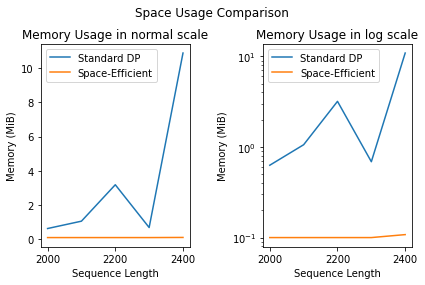

In [48]:
from numpy.lib.arraypad import pad

# Due to the limitatino of "memory_profiler", 
# there might be negative value in space efficient algorithm space consumption.
# the following code is to increment all space-efficient results to be positive so that it will show in log-scale plotting
minMemo = float("inf")
for i in range(len(meo1)):
  minMemo = min(minMemo, meo1[i])
if minMemo <= 0:
  for i in range(len(meo1)):
    meo1[i] += -minMemo + 0.1

# Plot for memory usage comparison
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.plot(sequence_length, meo2, label='Standard DP')
ax1.plot(sequence_length, meo1, label='Space-Efficient')
ax2.plot(sequence_length, meo2, label='Standard DP')
ax2.plot(sequence_length, meo1, label='Space-Efficient')
ax2.set_yscale('log')
ax1.set_xlabel('Sequence Length')
ax1.set_ylabel('Memory (MiB)')
ax1.set_title('Memory Usage in normal scale')
ax1.legend()
ax2.set_xlabel('Sequence Length')
ax2.set_ylabel('Memory (MiB)')
ax2.set_title('Memory Usage in log scale')
ax2.legend()

fig.suptitle("Space Usage Comparison")
fig.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

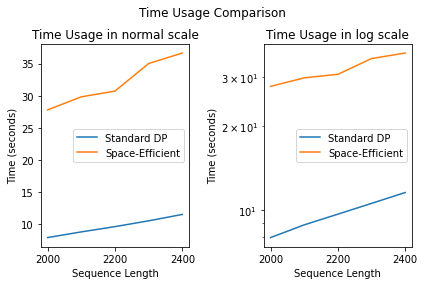

In [49]:
# Plot for time usage comparison
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.plot(sequence_length, time1, label='Standard DP')
ax1.plot(sequence_length, time2, label='Space-Efficient')
ax2.plot(sequence_length, time1, label='Standard DP')
ax2.plot(sequence_length, time2, label='Space-Efficient')
ax2.set_yscale('log')
ax1.set_xlabel('Sequence Length')
ax1.set_ylabel('Time (seconds)')
ax1.set_title('Time Usage in normal scale')
ax1.legend()
ax2.set_xlabel('Sequence Length')
ax2.set_ylabel('Time (seconds)')
ax2.set_title('Time Usage in log scale')
ax2.legend()

fig.suptitle("Time Usage Comparison")
fig.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

In [50]:
# This cell is for space & time consumption test with customized sequences. Sequences are chosen randomly from Homo sapiens isolate CHM13 chromosome 8 (GenBank: CP068270.2)
# Genome source: https://www.ncbi.nlm.nih.gov/nuccore/CP068270.2?report=fasta
# Note: This cell might take a long time to run with lage input (it took 52 min to align pair of sequences with length 17779 and 9933)
Sequence11 = "CTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTTAACCCTTAGCCCTAGCCCTAGCCCTAGCCCTAGCCCTAGCCCTAGCCCTAGCCCTAGCCCTAGCCCTAGCCCTAGCCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTATCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAAAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAAAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAAAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAAAACCCTAACCCTAAAACCCTAACCCTAAAACCCTAACCCTAACCCTGACCCTGACCCTGACCCTGACCCTGACCCTGACCCTGACCCTGACCCTAACCCTGACCCTAACCCTAACCCTGACCCTAACCCTAACCCTAACCCTAACCACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAAACCCTAAGCCCTAGCCCTAGCCCTAGCCCTAGCCCTAGCCCTAGCCCTAGCCCTAGCCCTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAAACCCTAAACCCTAACCCTAACCCTAACCCTAACCCTAACCCCAACCCCAACCCCAACCCCAACCCCAACCCCACCCCGAACCCCGAACCCCGAACCCGAACCCGAACCCGAACCCGAACCCGAACCCGAACCCGAACCCGAACCCGAACCCTAACCCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCCTAACCCTAATCCTAACCCTAACCCTAACCCTAACCCAACCCTAACCATAACCCAACCCTAACCCTAACCCTAGCCCCTAACCCAACCCTAACCCAAACCTAACCCTAGCCCCTAAACCTAAACCTAACTCCTAACCCCTAACTCCTAACCCTAACCCTAACCCTAACCCCTAACCCTAACCCCTAACCCCTATCCCTAACCCCTAACCCCTAACCCCAACCCCAACCCTAAACCCAACCCCAACCCCAACCCGACTCTGACCCTGAACCCGACCCCTAACCCTAAACCCTAACCCCTAACCCTAACCCTACCCCTAGCCCAAACCCGAACCCGAACCCGAACCCTAACCCTAACCCCTAACCCTAACCCCTAACCCTAACCCTTAACCCTAACCCTAACCCTACCCCAACCCCAACCCTAACCCCTAACCCCTAATCCTAACCCCTAACCCCTAACCCTCACCCTAACCCTAAACCACATGAGCAATGTGGGTGTTATATTTTGGGTGTCATGTGTGCATTAGGAATGCTGCATTTGTGTTCCGACACTGCAGTTGGCCCCTGCAATGCAGCCCCTCGCCTTGACTTGGGAGAATCTCGGTGCGCAGGATTCAGAGGGGCTTTTGGTTTCCCGTTTTCCACACTGAACCGTTCTAACTGGTCTCTGACCTTGATTATTAACGGCTGCAACCGGGAAAGATTTTATTCACCGTCGATGCGGCCCCGAGTTGTCCCAAAGCCAGGCAGTGCCCCCAACGTCTGTGCTTAGGAGAATGCTGCTCCACCTTTACGGTGTCCCCCAGGTCTGTGCTAAGCAGAACGCAGCTCCGCCCTCGCGGTGCCCTCAGCCCGCCCGCCCGGGTCTGACCTGAGGAGAACTCTGCTCCGCCTTCGCAGTACCACTGAAATCTGTGCAGATGAGAACGCAGCTCCGCCCTCGCGATGCTCTCCGCGTCTGTGCTGAGGAGAACCCAACTCCGCTCTCGCAAAGGCACGGCGCGCCGGCGCCGGCGCAGAGAGGCGCGCTGCGCCGGCGCAGGAGCTGTTCGGGAGACGCGGCGCAGGGCATAGACGCACGCCTCCGCGTCCCCGGAGGGGAGGGGTCGCTGGGCAGGCGGGAGTGAGGCGCGGCGCAGGCGCAGGCGCAGAGACGCACGTCGCTGGGCTCAGGGTGGCGGGGCGTGTTGCAGGTGTACAGTTGCACGCCGCCGGGCGGGGAGCGCGGGAATGGCGAGGTGCAGACGCAGAGACACACGTCCCCGGCGGCGCAGCGCACAGACGGGTGGAACCTGAGTAATCTGAAAAGCCCGGTTCGGGTGTCCCCTGCTTGTACCCGGGCACTACAGGACCTGCTTGCCCACGGTGCTGTGCCATTGCGCCCCCTGCTGGCGACTAGGGCAACTTCAGGGCCCTCTTCCTTACAGTGGTGTCCAGCGCCTCCTGCTGGCGACGGGGCACGGCAGGGCTCTCTTGCTCGCAGTATACTGGCGGCACGCCGCCTGCTGACAGCTAGG"
Sequence12 = "TGTTCCAAGACCGCAGCTTGGCCCTGTGGCCGCCTCGCCTTGGGTGTGGAGAATGAACCTCGAGTGCGCTGGATTCACAGGGGATTTTGGTTTCTAATTTTCCACATGAAGGGTCTCTACCCCTCAGCAGTCAGGGCTGAAAACAGGAAGGATTTTACTCAACCATGGACGCCGCCGGCTCAAGGTGTCCCAAAGCGAGGGGCGTTTCCTGGTATGTGCTGAGGAGAACGCGGCTCCCGCCCTTGCAGGGTGCAGGCGCGGAGGAAGCGTGCGGGATGCGGCCGCCTCAAGGCTCAGAAAAGCCGGGCTCGCGCGTGCTCTGCTGGCGGCCGGGGGCACTGCAGCGCCCTAGAGCTCAAGGCACTGTCGGAAGCTGAGCGCCCTCTGCTACCCCTCCTGCTGCACCAACTAAAAGACAGCATGGAGTGTTCGGCGCCATCATTCTAGAAATGCAAACTGACACAGAGCCCATTAGCCCGTGAGTTTCTAAAAATGCAGAAGGGACAATTAATTGGAAACCATAGGAAATGAAATCAACATGAATGCACATTTTACAACTTATGCAAAAAGTCACTCAACATAGTCCTCAGACTTAAAATGCAAAACCGTCAGAGGCCTCTTAACCACAGTGACTTTATTTCAAATAAAGGCTTTTAAAAAGTTAAATCTGGGCAGGGTGCAGTGGTCACATCTGTAATCCCAGCACTTTGGAAGGCCAAGGCGGGTGGATCACTTGAGATCAGGAGTTGAAGACCAGCTTGGGCAAATAGCAAGACCCTTATGTCTACAAAAAATATATATATATATATTAGATGGCATGCTTGCACATACCTGTAGTCCCAGCTACCCAGGAGGCTGAAGCGGGAGGATTGCTTGAGCCCAGGAGTTCGAGGCTGCAATGAGCCAGCCATAATCGCACCACTGCACTCCAGCCTGGGCGACAGAGTGAGACCCTGTCTCTCTCTCTCTGTCACACACACACACACGTTAAATTTGTTGGATTATATATTTCGGGGGTTGAGCACTTTTCGTTATAAAATATTTATGATTGTGGGAACAAGTTAATAAAGACATGAAAGTTATTTAAATGTCCCAGAACTTTAAGAACAAAAAGCATTCTTAGTTTAAAAATAAGTTTTACTTTAAAGGTAACAGTACACACATAAATTGTTGTTAAAATCGACAGTAACAAAGAGAAGTAACAATACTAATAGCCTGTCACAAACTGATTCTTAATAACCTATATAAACAAACATTAAGCCCGGGCGCCGGGTGGCTCATGCCTGTTATCCCAGCACTTTGGGAAGCCGAGGCAGGCAGATCACTTGAGGCCAGCAGTTCCAGACCAGCCTGACCAACATGGTGAAGCCCAGTCTCTACCAAAAACACAAAAAATTAGCCGGGTATATTGGCACGCACCTGTAATCCCAGCTACTTGGGAGACTGAGGCAGGAGAATCCTTGAACCCAGGAAGCAGAGGTCGCAGTGAGGCGAGACCATGCCATTGTGACAGGAGAGAAACTCTGTCTCAAAAAAAAATTATATGTTTACAACAGGTGCATTTCTCCTCTTGCTTTCTGAGGACGCCCTGCTATGTAGCTGAGTAGTCACTAATAAACTATCTTAACTTCACTATACTCTGTGACTTGCCAAAAGGTCTTTCCCATGTGAAATCCAAAAACCTGTTCTTGGGGTCTAGGACAAGACCCATTTTATAATGACAAAACTATACAAATTCTAGAGGGAAACATAGAAAGAAAGCTATGTGACCTTGCGTTTGGCCATGAGTTTTAACACGACACTATCAGAGGCATTTGAACCCCTCCTCTATATGAACTCCAGGGTGGTTTATGTTCCATTGGCTAAGAGAAAGTTTTCTTCAAAAATGTGACATGATTTGAGGTCAAACATTAATATCAAGTAAACTCAAAAGATTGAGAAGCTAGCATTAGTTCTGGGAAAACCAGAAGTGTGCCTTTTTTGGAAATAATCATTGGTAGCACAAACTTAAGAATCTCCAAAGGAAATAAAAATGAGTTATTAACTTACAGTTTTCACCAATTAAGATATAAATGAAGCTAACGAAATCCGGAAATACAATTTCACTGTTTTTAATGTTCATTAAAAAAAAATCCTTATCAAATAGCCCCAGTAAGTCACCAATTAAGTCTTTACTACTTAAAAGCAAAATCCACCTATGTCCTGAACAGTATCCACTTTACGAGCCTCATTATATGTACAGGAGATAAAATTCAGAAATAAATAAATATACATGTATACGTATACAAATATATTTCAAATTAAAAAATACTTTTAGATAGTGGTATGTATTACATTTAGAAATTAATAACGAAGTAAATTATGGGATGTCATCCACGCCTGTCCCAAAGGTACCGAATTTATAAATCATCTCAGGTGCGGAGCAGGACAGGTTGAAAATAGGAATGACATGAACCCGCGCGGAACAGCTGCCGGCACGGTGTCCAGGGCGGCACCCCGCCCGGTCCCGGCCCCTCCAGCCCTGGGCCCGACCCCTACTACGCCTCTGCCTCGACGCGAACGCGGAGCCCGAGCGCGCGTCACGCCGTGTGGGGCCGAAGAGGCTGCTACCCAGAGGCGGAGTGCGGGCTCGCGAGGGTCCCCACCCGACTCTCGCTCCCGCCAGCACCTACGGACTCGCGTCCCCGCCGCGCGCCGACTCGGGAGCAGCACCGCCCCCGGCACAGGAGCCTCACGCGCCTCTTACCTAACAGGAAGTTGGGTGGAAGCAGCGCGGACCCACGGCACACCGAACGCACTCCAACAGAACCCGACGCAGACACGCGCTTTCAACCGGCGGA"
Sequence11.replace(" ", "")
Sequence12.replace(" ", "")
v = Sequence11
w = Sequence12
print("Length of Sequence1: ", len(v))
print("Length of Sequence2: ", len(w))
y = %memit -o ori_fitting_align(v, w, delta)
memory_ned = y.mem_usage[0] - y.baseline
print("Standard DP Allignment Algorithm Memory Usage: " + str(memory_ned))

x = %memit -o space_efficient_fitting_align(v, w, delta)
memory_hir = x.mem_usage[0] - x.baseline
print("Space-efficient Alignment Memory Usage: " + str(memory_hir))

time_ned = timeit.timeit(lambda: ori_fitting_align(v, w, delta), number = 1)
time_hir = timeit.timeit(lambda: space_efficient_fitting_align(v, w, delta), number = 1)

print("Standard DP Fitting Allignment Algorithm Time Usage: " + str(time_ned))
print("Space-efficient Fitting Alignment Time Usage: " + str(time_hir))
print("---------------------------------")

Length of Sequence1:  3272
Length of Sequence2:  2840
peak memory: 3873.31 MiB, increment: 315.96 MiB
Standard DP Allignment Algorithm Memory Usage: 315.95703125
peak memory: 3629.41 MiB, increment: 0.04 MiB
Space-efficient Alignment Memory Usage: 0.0390625
Standard DP Fitting Allignment Algorithm Time Usage: 19.190673023998897
Space-efficient Fitting Alignment Time Usage: 60.42955567900026
---------------------------------
